In [1216]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
%matplotlib inline

In [1217]:
df = pd.read_csv("AirlineReviews.csv", encoding="UTF-8")

In [1218]:
print(df['airline_sentiment'] == "positive")

0        False
1         True
2        False
3        False
4        False
         ...  
14635     True
14636    False
14637    False
14638    False
14639    False
Name: airline_sentiment, Length: 14640, dtype: bool


In [1219]:
def quantify_sentiment(col):
    if col == "positive":
        return 1.0
    elif col == "negative":
        return 0.0
    else:
        return 0.5

In [1220]:
df['airline_sentiment'] = df['airline_sentiment'].apply(quantify_sentiment)

In [1221]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,0.5,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,1.0,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,0.5,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,0.0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,0.0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,681679794,False,finalized,3,2/25/15 19:46,1.0,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/15 12:01,5.695880e+17,NaN,NaN
14636,681679795,False,finalized,3,2/25/15 19:14,0.0,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/15 11:59,5.695870e+17,Texas,NaN
14637,681679796,False,finalized,3,2/25/15 19:04,0.5,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/15 11:59,5.695870e+17,"Nigeria,lagos",NaN
14638,681679797,False,finalized,3,2/25/15 18:59,0.0,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/15 11:59,5.695870e+17,New Jersey,Eastern Time (US & Canada)


In [1222]:
df = df[['text', 'airline_sentiment']]

In [1223]:
df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,0.5
1,@VirginAmerica plus you've added commercials t...,1.0
2,@VirginAmerica I didn't today... Must mean I n...,0.5
3,@VirginAmerica it's really aggressive to blast...,0.0
4,@VirginAmerica and it's a really big bad thing...,0.0
...,...,...
14635,@AmericanAir thank you we got on a different f...,1.0
14636,@AmericanAir leaving over 20 minutes Late Flig...,0.0
14637,@AmericanAir Please bring American Airlines to...,0.5
14638,"@AmericanAir you have my money, you change my ...",0.0


In [1224]:
def remove_usernames(col):
            string = col
            usernames = re.findall("@\w+", col)
            for username in usernames:
                string = col.replace(username, "")
            
            return string

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\smeye\AppData\Local\Temp\ipykernel_14692\3651988153.py:3: SyntaxWarning: invalid escape sequence '\w'
  usernames = re.findall("@\w+", col)


In [1225]:
df2 = pd.read_csv("HotelReviews.csv")

In [1226]:
df2

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


In [1227]:
is_string_dtype(df2['reviews.text'])

False

In [1228]:
df2.dtypes

address                  object
categories               object
city                     object
country                  object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateAdded        object
reviews.doRecommend     float64
reviews.id              float64
reviews.rating          float64
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.username         object
reviews.userProvince     object
dtype: object

In [1229]:
import re

In [1230]:
txt = "@VirginAmerica Is the @worst I swear!!"
re.findall(r"@\w+",txt)

['@VirginAmerica', '@worst']

In [1231]:
def remove_usernames(col):
    string = col
    usernames = re.findall(r"(@\w+|#\w+)", string)
    print(usernames)
    for username in usernames:
        string = string.replace(username, "")
    
    return string

In [1232]:
df['text'] = df['text'].apply(remove_usernames)

['@VirginAmerica', '@dhepburn']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@virginamerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica', '@Australia']
['@VirginAmerica', '@virginmedia', '#fabulous', '#Seductive', '#stress']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica', '#29DaysToGo']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica', '#fail']
['@VirginAmerica']
['@VirginAmerica', '#VX358', '#noair', '#worstflightever', '#roasted', '#SFOtoBOS']
['@VirginAmerica', '#sendambien', '#andchexmix']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica']
['@VirginAmerica', '@Pacificbiznews']
['@VirginAmerica', '#MoodlitMonday', '#ScienceBehindTheExperience']
['@VirginAmerica', '#MoodlitMonday']
['@VirginAm

C:\Users\smeye\AppData\Local\Temp\ipykernel_14692\746752117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_usernames)


In [1233]:
df

,text,airline_sentiment
0,What said.,0.5
1,plus you've added commercials to the experien...,1.0
2,I didn't today... Must mean I need to take an...,0.5
3,"it's really aggressive to blast obnoxious ""en...",0.0
4,and it's a really big bad thing about it,0.0
...,...,...
14635,thank you we got on a different flight to Chi...,1.0
14636,leaving over 20 minutes Late Flight. No warni...,0.0
14637,Please bring American Airlines to,0.5
14638,"you have my money, you change my flight, and ...",0.0


In [1234]:
df['text'] = df['text'].apply(remove_usernames)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

C:\Users\smeye\AppData\Local\Temp\ipykernel_14692\746752117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_usernames)


In [1235]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import re
import nltk
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

class Model:
    #DATASETS = ["SocialMedia", "AmazonReviews", "TechProductReviews", "AirlineReviews", "DrugReviews", "HotelReviews", "MovieReviews", "News"]
    datasetChoice = ""
    #MODEL_TYPES = ["LogisticRegression", "SupportVectorMachine", "RandomForest", "KMeansClustering"]
    modelType = ""
    df = pd.DataFrame()
    model = "Model"

    #Constructor
    def __init__(self, a_datasetChoice, a_modelType, a_textColumn, a_sentimentColumn, a_posLabel = "positive", a_negLabel = "negative"):
        self.datasetChoice = a_datasetChoice
        self.modelType = a_modelType
        self.df = pd.read_csv(f"{a_datasetChoice}.csv")
        self.autoCleaner(a_textColumn, a_sentimentColumn)
        print(self.df.head())

    #Generate model based on type of model chosen and dataset chosen
    def generateModel(self, a_textColumn, a_sentimentColumn):
        #Split data into x and y values for Model
        x = self.df[a_textColumn]
        y = self.df[a_sentimentColumn]

        #Split data into training data (70%) and test data (30%)
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

        #Make vectorizer, fit data to it
        vectorizer = CountVectorizer()
        x_train_vec = vectorizer.fit_transform(x_train)
        x_test_vec = vectorizer.transform(x_test)

        #Generate Model based on what was entered
        if self.modelType == "LogisticRegression":
            self.model = LogisticRegression()
            self.model.fit(x_train_vec, y_train)
        elif self.modelType == "SupportVectorMachine":
            #Implement Later
            self.model = "svm"
        elif self.modelType == "RandomForest":
            #Implement Later
            self.model = "random forest"
        elif self.model == "KMeansClustering":
            #Implement Later
            self.model = "KMeansClustering"
        else:
            self.model = "UNSUPPORTED MODEL TYPE"
        



    #Get info for the current dataset
    #def getDatasetInfo(self):
        
    def autoCleaner(self, a_textColumn, a_sentimentColumn, a_posLabel = "positive", a_negLabel = "negative"):
        self.df = self.df[[a_textColumn, a_sentimentColumn]]
        
        #Transform ratings into the correct format (0.0-1.0)
        #def transform_numeric_ratings(a_col):
            
            
        #Is a_sentimentColumn already comprised of numbers? If not, change that!
        # if not is_numeric_dtype(self.df[a_sentimentColumn]):
        #     self.df[a_sentimentColumn] = self.df[a_sentimentColumn].apply(quantify_sentiment)
        
        #Remove Usernames with @ from the text data 
        def clean_text(a_col):
            string = a_col
            usernamesAndHashtags = re.findall(r"(@\w+|#\w+)", a_col)
            for uAndH in usernamesAndHashtags:
                string = string.replace(uAndH, "")

            for word in string:
                if not word.isalnum():
                    word = re.sub(r'[\W_]+', "", word)
            
            return string
        
        self.df[a_textColumn] = self.df[a_textColumn].apply(clean_text)
        return self.df
        print(self.df.head())
        print(self.df.tail())

model = Model("AirlineReviews", "LogisticRegression", "text", "airline_sentiment")

                                                text airline_sentiment
0                                        What  said.           neutral
1   plus you've added commercials to the experien...          positive
2   I didn't today... Must mean I need to take an...           neutral
3   it's really aggressive to blast obnoxious "en...          negative
4           and it's a really big bad thing about it          negative


<Axes: xlabel='airline_sentiment', ylabel='count'>

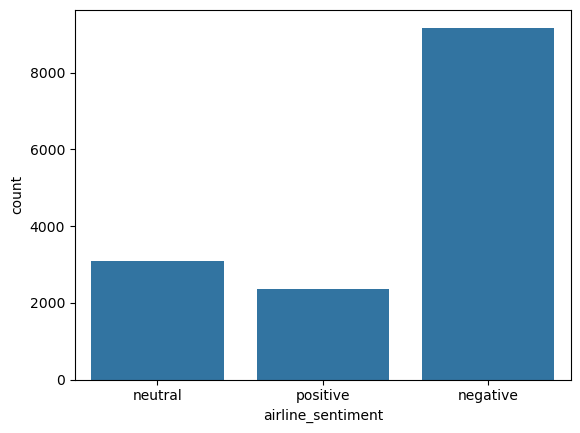

In [1236]:
sns.countplot(x='airline_sentiment',data=model.df)

In [1237]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [1238]:
x = model.df["text"]
y = model.df["airline_sentiment"]

In [1239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [1240]:
vectorizer=CountVectorizer()
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)
LRModel = LogisticRegression()
LRModel.fit(x_train_vec,y_train)

LogisticRegression()

In [1241]:
model.df.drop(model.df[model.df.airline_sentiment == 0.5].index)

,text,airline_sentiment
0,What said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to Chi...,positive
14636,leaving over 20 minutes Late Flight. No warni...,negative
14637,Please bring American Airlines to,neutral
14638,"you have my money, you change my flight, and ...",negative


In [1242]:
model.df

,text,airline_sentiment
0,What said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to Chi...,positive
14636,leaving over 20 minutes Late Flight. No warni...,negative
14637,Please bring American Airlines to,neutral
14638,"you have my money, you change my flight, and ...",negative


In [1243]:
y_pred = LRModel.predict(x_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy", accuracy)

accuracy 0.799408014571949


In [1244]:
Report=classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

    negative       0.86      0.89      0.88      2780
     neutral       0.62      0.62      0.62       895
    positive       0.76      0.67      0.71       717

    accuracy                           0.80      4392
   macro avg       0.75      0.73      0.74      4392
weighted avg       0.80      0.80      0.80      4392



In [1245]:
new_review = ["I hate this airline! They killed my whole family!"]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=LRModel.predict(new_review_vec)
print("Predicted sentiment",pred_sentiment)

Predicted sentiment ['negative']


In [1246]:
new_review = ["I am fine with this airline"]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=LRModel.predict(new_review_vec)
print("Predicted sentiment",pred_sentiment)

Predicted sentiment ['positive']


In [1247]:
new_review = ["I am"]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=LRModel.predict(new_review_vec)
print("Predicted sentiment",pred_sentiment)

Predicted sentiment ['neutral']


In [1248]:
from sklearn.metrics import confusion_matrix

In [1249]:

confusion_matrix(y_test,y_pred)

array([[2479,  222,   79],
       [ 270,  554,   71],
       [ 119,  120,  478]], dtype=int64)

<Axes: >

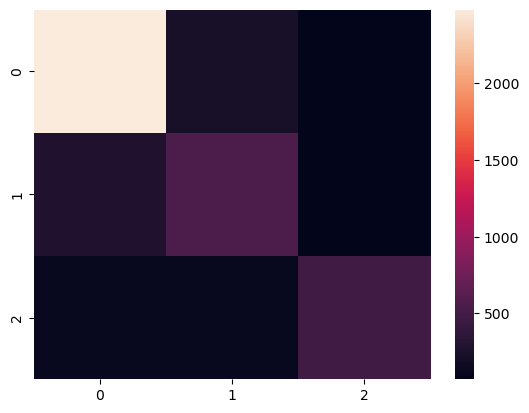

In [1250]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [1251]:
new_review = ["This is an airline"]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=LRModel.predict(new_review_vec)
print("Predicted sentiment",pred_sentiment)

Predicted sentiment ['negative']


In [1252]:
from nltk.corpus import stopwords

In [1253]:
stop = stopwords.words('english')

In [1254]:
def remove_stopwords(a_col):
    string = a_col.split()
    for word in string:
        for stopword in stop:
            if word == stopword or word == stopword.upper():
                string.remove(word)
            
    putBack = ""
    for word in string:
        putBack = putBack + word + " "
    return putBack
            


In [1255]:
model.df['text'] = model.df['text'].apply(remove_stopwords)

In [1256]:
model.df

,text,airline_sentiment
0,What said.,neutral
1,plus added commercials the experience... tacky.,positive
2,didn't today... Must mean need take another tr...,neutral
3,"really aggressive blast obnoxious ""entertainme...",negative
4,it's really big bad thing it,negative
...,...,...
14635,thank we got a different flight Chicago.,positive
14636,leaving 20 minutes Late Flight. No warnings co...,negative
14637,Please bring American Airlines,neutral
14638,"have money, change flight, don't answer phones...",negative


In [1257]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [1258]:
drug = pd.read_csv("DrugReviews.csv")

In [1259]:
drug

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,0,163740,Mirtazapine,depression,"""i've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22,68
1,1,206473,Mesalamine,"crohn's disease, maintenance","""my son has crohn's disease and has done very ...",8.0,"May 17, 2009",17,48
2,2,39293,Contrave,weight loss,"""contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,143
3,3,97768,Cyclafem 1 / 35,birth control,"""i have been on this birth control for one cyc...",9.0,"October 22, 2015",4,149
4,4,208087,Zyclara,keratosis,"""4 days in on first 2 weeks. using on arms an...",4.0,"July 3, 2014",13,60
...,...,...,...,...,...,...,...,...,...
46103,6103,123432,Apri,birth control,"""i started taking apri about 7 months ago. my ...",9.0,"August 25, 2010",18,86
46104,6104,159999,Tamoxifen,"breast cancer, prevention","""i have taken tamoxifen for 5 years. side effe...",10.0,"September 13, 2014",43,97
46105,6105,140714,Escitalopram,anxiety,"""i've been taking lexapro (escitaploprgram) si...",9.0,"October 8, 2016",11,130
46106,6106,130945,Levonorgestrel,birth control,"""i'm married, 34 years old and i have no kids....",8.0,"November 15, 2010",7,149


In [1260]:
tech = pd.read_csv("TechProductReviews.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'TechProductReviews.csv'

In [ ]:
tech

In [ ]:
tech.info()

In [ ]:
tech.columns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

class Model:
    #DATASETS = ["SocialMedia", "AmazonReviews", "TechProductReviews", "AirlineReviews", "DrugReviews", "HotelReviews", "MovieReviews", "News"]
    datasetChoice = ""
    #MODEL_TYPES = ["LogisticRegression", "SupportVectorMachine", "RandomForest", "KMeansClustering"]
    modelType = ""
    df = pd.DataFrame()
    model = "Model"
    x_train = ""
    x_test = ""
    y_train = ""
    y_test = ""
    vectorizer = ""
    x_train_vec = ""
    x_test_vec = ""
    y_pred = ""


    #Constructor
    def __init__(self, a_datasetChoice, a_modelType, a_textColumn, a_sentimentColumn, posLabel, negLabel, neutLabel):
        self.datasetChoice = a_datasetChoice
        self.modelType = a_modelType
        self.df = pd.read_csv(f"{a_datasetChoice}.csv")
        self.autoCleaner(a_textColumn, a_sentimentColumn, posLabel, negLabel, neutLabel)
        self.generateModel(a_textColumn, a_sentimentColumn)
        print(self.df.head())

    #Generate model based on type of model chosen and dataset chosen
    def generateModel(self, a_textColumn, a_sentimentColumn):
        #Split data into x and y values for Model
        x = self.df[a_textColumn]
        y = self.df[a_sentimentColumn]

        #Split data into training data (70%) and test data (30%)
        self.x_train,self.x_test,self.y_train,self.y_test=train_test_split(x,y,test_size=0.3)

        #Make vectorizer, fit data to it
        self.vectorizer = CountVectorizer()
        self.x_train_vec = self.vectorizer.fit_transform(self.x_train)
        self.x_test_vec = self.vectorizer.transform(self.x_test)

        #Generate Model based on what was entered and fit it to the training data
        if self.modelType == "LogisticRegression":
            self.model = LogisticRegression()
            self.model.fit(self.x_train_vec, self.y_train)
        elif self.modelType == "SupportVectorMachine":
            #Implement Later
            self.model = "svm"
        elif self.modelType == "RandomForest":
            #Implement Later
            self.model = "random forest"
        elif self.model == "KMeansClustering":
            #Implement Later
            self.model = "KMeansClustering"
        else:
            self.model = "UNSUPPORTED MODEL TYPE"
        
    def predict(self, textToPredict):
        textToPredict = [textToPredict]
        textToPredict_vec = self.vectorizer.transform(textToPredict)
        return self.model.predict(textToPredict_vec)

    #Get info for the current dataset
    #def getDatasetInfo(self):
        
    def autoCleaner(self, a_textColumn, a_sentimentColumn, posLabel, negLabel, neutLabel):
        self.df = self.df[[a_textColumn, a_sentimentColumn]]

        #drop any labels that aren't specified
        labels = [f"{posLabel}", f"{negLabel}", f"{neutLabel}"]
        def drop_not_in_labels(a_col):
            if a_col not in labels:
                return np.nan
            else: 
                return a_col

        def remove_not_str(a_col):
            if type(a_col) is not str:
                return np.nan
            else:
                return a_col

        self.df[a_sentimentColumn] = self.df[a_sentimentColumn].apply(drop_not_in_labels)
        self.df[a_textColumn] = self.df[a_textColumn].apply(remove_not_str)
        self.df = self.df.dropna()
        
        #Transform ratings into the correct format (0.0-1.0)
        #def transform_numeric_ratings(a_col):
            
            
        #Is a_sentimentColumn already comprised of numbers? If not, change that!
        # if not is_numeric_dtype(self.df[a_sentimentColumn]):
        #     self.df[a_sentimentColumn] = self.df[a_sentimentColumn].apply(quantify_sentiment)
        
        #Remove Usernames with @ from the text data 
        def clean_text(a_col):
            string = a_col
            usernamesAndHashtags = re.findall(r"(@\w+|#\w+)", a_col)
            for uAndH in usernamesAndHashtags:
                string = string.replace(uAndH, "")

            for word in string:
                if not word.isalnum():
                    word = re.sub(r'[\W_]+', "", word)
            
            return string
        
        stop = stopwords.words('english')
        def remove_stopwords(a_col):
            string = a_col.split()
            for word in string:
                for stopword in stop:
                    if word == stopword or word == stopword.upper():
                        string.remove(word)
                    
            putBack = ""
            for word in string:
                putBack = putBack + word + " "
            return putBack.strip()
        
        self.df[a_textColumn] = self.df[a_textColumn].apply(clean_text)
        self.df[a_textColumn] = self.df[a_textColumn].apply(remove_stopwords)
        return self.df
        print(self.df.head())
        print(self.df.tail())

model = Model("News", "LogisticRegression", "tweet_text", "is_there_an_emotion_directed_at_a_brand_or_product", "Positive emotion", "Negative emotion", "No emotion toward brand or product")
print(model.predict("candy"))
model.y_pred = model.model.predict(model.x_test_vec)
accuracy = accuracy_score(model.y_test, model.y_pred)
print("accuracy", accuracy)
heatmap = sns.heatmap(confusion_matrix(model.y_test,model.y_pred))
fig = heatmap.get_figure()
fig.savefig("out.png")

In [ ]:
my_plot = sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=model.df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

In [ ]:
socmed = pd.read_csv("SocialMedia.csv")

In [ ]:
socmed

In [ ]:
sns.countplot(x="Sentiment", data=socmed)

In [ ]:
mov = pd.read_csv("MovieReviews.csv")

In [ ]:
mov

In [ ]:
sns.countplot(x="sentiment", data=mov)

In [ ]:
reddit = pd.read_csv("Reddit_Data.csv")

In [ ]:
reddit

In [ ]:
twitter = pd.read_csv("Twitter_Data.csv")

In [ ]:
twitter

In [ ]:
reddit = reddit.rename(columns={"clean_comment": "clean_text"})

In [ ]:
#SocialMedia = pd.concat([twitter, reddit])

In [ ]:
#SocialMedia

In [ ]:
#SocialMedia.to_csv("SocialMedia.csv", index=False)

                                        reviews.text reviews.rating
0  Pleasant 10 min walk along sea front the Water...       positive
1  Really lovely hotel. Stayed the top floor surp...       positive
2  Ett mycket bra hotell. Det som drog ner betyge...       positive
3  We stayed four nights October. The hotel staff...       positive
4  We stayed four nights October. The hotel staff...       positive
['negative']
accuracy 0.7424015009380863


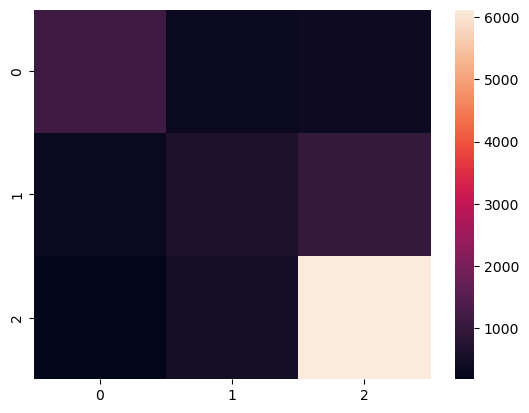

In [1625]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

class Model:
    #DATASETS = ["SocialMedia", "AmazonReviews", "TechProductReviews", "AirlineReviews", "DrugReviews", "HotelReviews", "MovieReviews", "News"]
    datasetChoice = ""
    #MODEL_TYPES = ["LogisticRegression", "SupportVectorMachine", "RandomForest", "KMeansClustering"]
    modelType = ""
    df = pd.DataFrame()
    model = "Model"
    x_train = ""
    x_test = ""
    y_train = ""
    y_test = ""
    vectorizer = ""
    x_train_vec = ""
    x_test_vec = ""
    y_pred = ""


    #Constructor
    def __init__(self, a_datasetChoice, a_modelType, a_textColumn, a_sentimentColumn, posLabel = "positive", negLabel = "negative", neutLabel = "neutral"):
        self.datasetChoice = a_datasetChoice
        self.modelType = a_modelType
        self.df = pd.read_csv(f"{a_datasetChoice}.csv")
        self.autoCleaner(a_textColumn, a_sentimentColumn, posLabel, negLabel, neutLabel)
        self.generateModel(a_textColumn, a_sentimentColumn)
        print(self.df.head())

    #Generate model based on type of model chosen and dataset chosen
    def generateModel(self, a_textColumn, a_sentimentColumn):
        #Split data into x and y values for Model
        x = self.df[a_textColumn]
        y = self.df[a_sentimentColumn]

        #Split data into training data (70%) and test data (30%)
        self.x_train,self.x_test,self.y_train,self.y_test=train_test_split(x,y,test_size=0.3)

        #Make vectorizer, fit data to it
        self.vectorizer = CountVectorizer()
        self.x_train_vec = self.vectorizer.fit_transform(self.x_train)
        self.x_test_vec = self.vectorizer.transform(self.x_test)

        #Generate Model based on what was entered and fit it to the training data
        if self.modelType == "LogisticRegression":
            self.model = LogisticRegression(max_iter=350)
            self.model.fit(self.x_train_vec, self.y_train)
        elif self.modelType == "SupportVectorMachine":
            #Implement Later
            self.model = "svm"
        elif self.modelType == "RandomForest":
            #Implement Later
            self.model = "random forest"
        elif self.model == "KMeansClustering":
            #Implement Later
            self.model = "KMeansClustering"
        else:
            self.model = "UNSUPPORTED MODEL TYPE"
        
    def predict(self, textToPredict):
        textToPredict = [textToPredict]
        textToPredict_vec = self.vectorizer.transform(textToPredict)
        return self.model.predict(textToPredict_vec)

    #Get info for the current dataset
    #def getDatasetInfo(self):
        
    def autoCleaner(self, a_textColumn, a_sentimentColumn, posLabel = "positive", negLabel = "negative", neutLabel = "neutral"):
        self.df = self.df[[a_textColumn, a_sentimentColumn]]

        if is_numeric_dtype(self.df[a_sentimentColumn]):
            max = self.df[a_sentimentColumn].max()
            min = self.df[a_sentimentColumn].min()

            if min < 0:
                distToOne = 1 - min
                def no_negative(a_col):
                    return a_col + distToOne
                self.df[a_sentimentColumn] = self.df[a_sentimentColumn].apply(no_negative)
                min = min + distToOne
                max = max + distToOne

            def numeric_to_categorical(a_col):
                #print(f"a_col: {a_col}, max: {max}, min: {min}, a_col
                if a_col == max or a_col / max >= 0.7:
                    return "positive"
                elif a_col == min or a_col / max <= 0.4:
                    return "negative"
                else:
                    return "neutral"
            self.df[a_sentimentColumn] = self.df[a_sentimentColumn].apply(numeric_to_categorical)
            posLabel = "positive"
            negLabel = "negative"
            neutLabel = "neutral"
        
        #drop any labels that aren't specified
        labels = [f"{posLabel}", f"{negLabel}", f"{neutLabel}"]
        def drop_not_in_labels(a_col):
            if a_col not in labels:
                return np.nan
            else: 
                return a_col

        #drop any non-strings in text column
        def remove_not_str(a_col):
            if type(a_col) is not str:
                return np.nan
            else:
                return a_col

        self.df[a_sentimentColumn] = self.df[a_sentimentColumn].apply(drop_not_in_labels)
        self.df[a_textColumn] = self.df[a_textColumn].apply(remove_not_str)
        self.df = self.df.dropna()
        
        #Transform ratings into the correct format (0.0-1.0)
        #def transform_numeric_ratings(a_col):
            
            
        #Is a_sentimentColumn already comprised of numbers? If not, change that!
        # if not is_numeric_dtype(self.df[a_sentimentColumn]):
        #     self.df[a_sentimentColumn] = self.df[a_sentimentColumn].apply(quantify_sentiment)
        
        #Remove Usernames with @ from the text data 
        def clean_text(a_col):
            string = a_col
            usernamesAndHashtags = re.findall(r"(@\w+|#\w+)", a_col)
            for uAndH in usernamesAndHashtags:
                string = string.replace(uAndH, "")

            for word in string:
                if not word.isalnum():
                    word = re.sub(r'[\W_]+', "", word)
            
            return string
        
        stop = stopwords.words('english')
        def remove_stopwords(a_col):
            string = a_col.split()
            for word in string:
                for stopword in stop:
                    if word == stopword or word == stopword.upper():
                        string.remove(word)
                    
            putBack = ""
            for word in string:
                putBack = putBack + word + " "
            return putBack.strip()
        
        self.df[a_textColumn] = self.df[a_textColumn].apply(clean_text)
        self.df[a_textColumn] = self.df[a_textColumn].apply(remove_stopwords)
        return self.df
        print(self.df.head())
        print(self.df.tail())

model = Model("HotelReviews", "LogisticRegression", "reviews.text", "reviews.rating")
print(model.predict("This is awful"))
model.y_pred = model.model.predict(model.x_test_vec)
accuracy = accuracy_score(model.y_test, model.y_pred)
print("accuracy", accuracy)
heatmap = sns.heatmap(confusion_matrix(model.y_test,model.y_pred))
fig = heatmap.get_figure()
fig.savefig("out.png")

              precision    recall  f1-score   support

    negative       0.88      0.84      0.86     13194
     neutral       0.92      0.97      0.95     20611
    positive       0.93      0.92      0.93     26233

    accuracy                           0.92     60038
   macro avg       0.91      0.91      0.91     60038
weighted avg       0.92      0.92      0.92     60038



<Axes: xlabel='category', ylabel='count'>

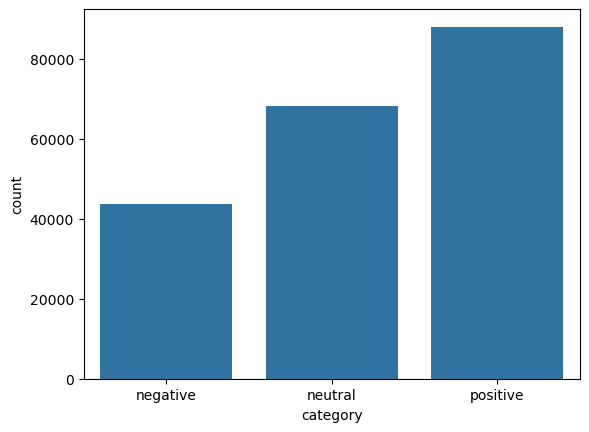

In [1350]:
sns.countplot(x="category", data=model.df)

['negative']
accuracy 0.9184683034078417


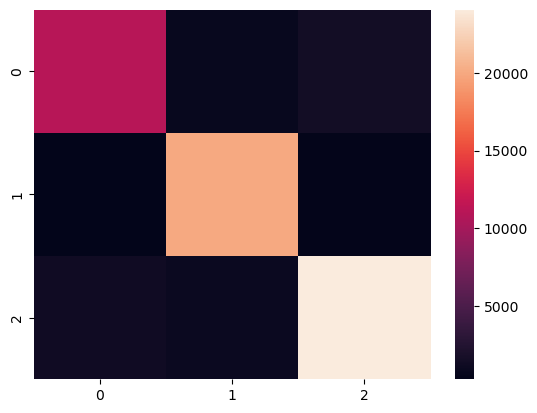

In [1346]:
print(model.predict("I am having a bad time"))
model.y_pred = model.model.predict(model.x_test_vec)
accuracy = accuracy_score(model.y_test, model.y_pred)
print("accuracy", accuracy)
heatmap = sns.heatmap(confusion_matrix(model.y_test,model.y_pred))
fig = heatmap.get_figure()
fig.savefig("out.png")

['negative']
accuracy 0.9184683034078417


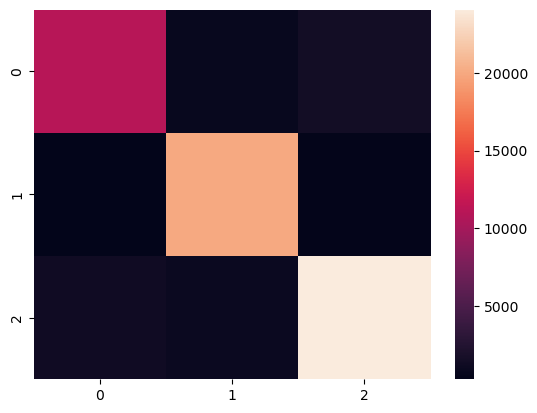

In [1348]:
print(model.predict("This product is so awful"))
model.y_pred = model.model.predict(model.x_test_vec)
accuracy = accuracy_score(model.y_test, model.y_pred)
print("accuracy", accuracy)
heatmap = sns.heatmap(confusion_matrix(model.y_test,model.y_pred))
fig = heatmap.get_figure()
fig.savefig("out.png")

In [1322]:
drug = pd.read_csv("DrugReviews.csv")

In [1324]:
drug

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,0,163740,Mirtazapine,depression,"""i've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22,68
1,1,206473,Mesalamine,"crohn's disease, maintenance","""my son has crohn's disease and has done very ...",8.0,"May 17, 2009",17,48
2,2,39293,Contrave,weight loss,"""contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,143
3,3,97768,Cyclafem 1 / 35,birth control,"""i have been on this birth control for one cyc...",9.0,"October 22, 2015",4,149
4,4,208087,Zyclara,keratosis,"""4 days in on first 2 weeks. using on arms an...",4.0,"July 3, 2014",13,60
...,...,...,...,...,...,...,...,...,...
46103,6103,123432,Apri,birth control,"""i started taking apri about 7 months ago. my ...",9.0,"August 25, 2010",18,86
46104,6104,159999,Tamoxifen,"breast cancer, prevention","""i have taken tamoxifen for 5 years. side effe...",10.0,"September 13, 2014",43,97
46105,6105,140714,Escitalopram,anxiety,"""i've been taking lexapro (escitaploprgram) si...",9.0,"October 8, 2016",11,130
46106,6106,130945,Levonorgestrel,birth control,"""i'm married, 34 years old and i have no kids....",8.0,"November 15, 2010",7,149


In [1372]:
model = Model("DrugReviews", "LogisticRegression", "review", "rating", "", "", "")

                                              review    rating
0  "i've tried few antidepressants years (citalop...  positive
1  "my son crohn's disease has done well the asac...  positive
2  "contrave combines drugs were used alcohol, sm...  positive
3  "i birth control one cycle. reading reviews ty...  positive
4  "4 days first 2 weeks. using arms face. put va...  negative


In [1374]:
model.df.head(10)

,review,rating
0,"""i've tried few antidepressants years (citalop...",positive
1,"""my son crohn's disease has done well the asac...",positive
2,"""contrave combines drugs were used alcohol, sm...",positive
3,"""i birth control one cycle. reading reviews ty...",positive
4,"""4 days first 2 weeks. using arms face. put va...",negative
5,"""i've copper coil about 3 months now. was real...",neutral
6,"""this great me. i've been on for 2 weeks in la...",positive
7,"""ive on methadone over ten years currently,i t...",positive
8,"""i pill almost two years. does work far not ge...",negative
9,"""holy hell exactly feel. had taking brisdelle ...",negative


In [1340]:
drug.head(10)

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,0,163740,Mirtazapine,depression,"""i've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22,68
1,1,206473,Mesalamine,"crohn's disease, maintenance","""my son has crohn's disease and has done very ...",8.0,"May 17, 2009",17,48
2,2,39293,Contrave,weight loss,"""contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,143
3,3,97768,Cyclafem 1 / 35,birth control,"""i have been on this birth control for one cyc...",9.0,"October 22, 2015",4,149
4,4,208087,Zyclara,keratosis,"""4 days in on first 2 weeks. using on arms an...",4.0,"July 3, 2014",13,60
5,5,215892,Copper,birth control,"""i've had the copper coil for about 3 months n...",6.0,"June 6, 2016",1,109
6,6,169852,Amitriptyline,migraine prevention,"""this has been great for me. i've been on it f...",9.0,"April 21, 2009",32,64
7,7,23295,Methadone,opiate withdrawal,"""ive been on methadone for over ten years and ...",7.0,"October 18, 2016",21,78
8,8,71428,Levora,birth control,"""i was on this pill for almost two years. it d...",2.0,"April 16, 2011",3,93
9,9,196802,Paroxetine,hot flashes,"""holy hell is exactly how i feel. i had been t...",1.0,"February 22, 2017",17,131


<Axes: xlabel='rating', ylabel='count'>

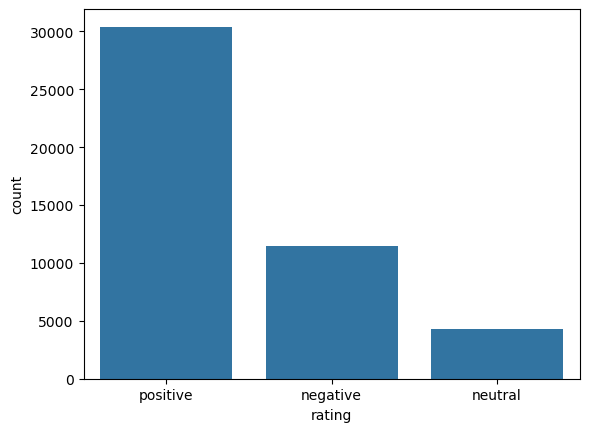

In [1378]:
sns.countplot(x="rating",data=model.df)

In [1392]:
model.predict("I have no opinion")

array(['positive'], dtype=object)

In [1394]:
hotel = pd.read_csv("HotelReviews.csv")

In [1396]:
hotel

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


C:\Users\smeye\AppData\Local\Temp\ipykernel_14692\484885323.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


<Axes: xlabel='reviews.rating', ylabel='count'>

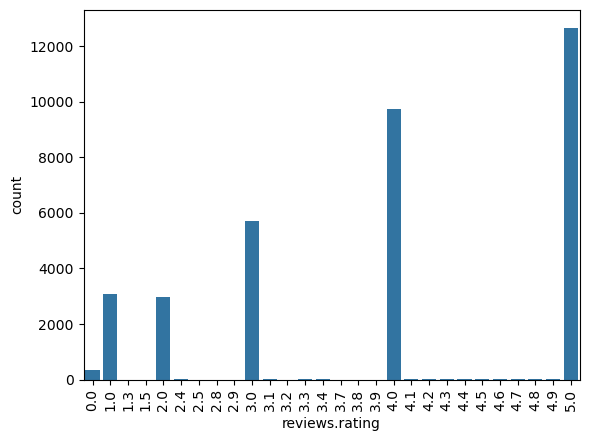

In [1438]:
my_plot = sns.countplot(x="reviews.rating",data=hotel)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot

In [1440]:
model = Model("HotelReviews", "LogisticRegression", "reviews.text", "reviews.rating")

                                        reviews.text reviews.rating
0  Pleasant 10 min walk along sea front the Water...       positive
1  Really lovely hotel. Stayed the top floor surp...       positive
2  Ett mycket bra hotell. Det som drog ner betyge...       positive
3  We stayed four nights October. The hotel staff...       positive
4  We stayed four nights October. The hotel staff...       positive


C:\Users\smeye\AppData\Local\Temp\ipykernel_14692\1006314185.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)


<Axes: xlabel='reviews.rating', ylabel='count'>

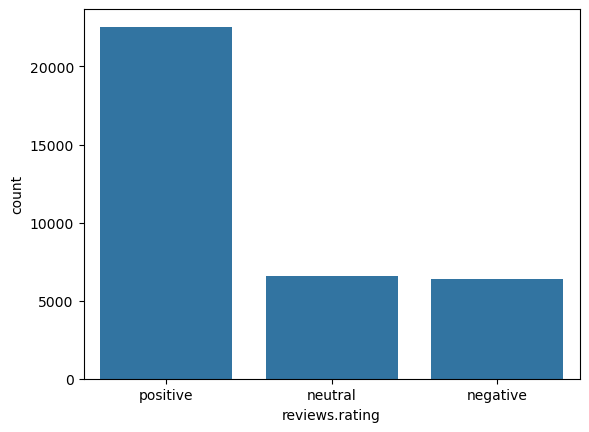

In [1442]:
myplot = sns.countplot(x='reviews.rating', data=model.df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
myplot

In [1426]:
hotel = hotel.drop(hotel[hotel["reviews.rating"] > 5].index)

In [1428]:
hotel

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


In [1434]:
hotel.to_csv("HotelReviews.csv", index=False)

In [1436]:
hotel = pd.read_csv("HotelReviews.csv")

In [1456]:
model.predict("The manager ate my son")

array(['positive'], dtype=object)

In [1496]:
print(model.df[model.df['reviews.rating'] == "negative"].count())

reviews.text      6382
reviews.rating    6382
dtype: int64


In [1492]:
len(model.df[model.df['reviews.rating'] == "neutral"].index)
nums = {"neutral": len(model.df[model.df['reviews.rating'] == "neutral"].index), "positive": len(model.df[model.df['reviews.rating'] == "positive"].index), "negative": len(model.df[model.df['reviews.rating'] == "negative"].index)}

In [1494]:
min(nums)

'negative'

In [1608]:
indices = {"neutral": model.df[model.df['reviews.rating'] == "neutral"].index, "positive": model.df[model.df['reviews.rating'] == "positive"].index, "negative": model.df[model.df['reviews.rating'] == "negative"].index}
dfs = {"neutral": pd.DataFrame(model.df.loc[indices["neutral"]]), "positive": pd.DataFrame(model.df.loc[indices["positive"]]), "negative": pd.DataFrame(model.df.loc[indices["negative"]])}

for key in nums.keys():
    remove_n = -(nums[min(nums)] - nums[key])
    if remove_n != 0:
        drop_indices = np.random.choice(indices[key], remove_n, replace=False)
        dfs[key] = dfs[key].drop(drop_indices)
        print(len(drop_indices))

224
16161


In [1612]:
combined = pd.concat([dfs["neutral"], dfs["positive"], dfs["negative"]])

In [1604]:
combined.dropna()

,reviews.text,reviews.rating
19,"Hotellihuone oli ullakolla, jossa ei pystynyt ...",negative
20,stay unless less 2 feet tall like sleeping cen...,negative
44,"Walls extremely thin, can hear everything. Exc...",negative
57,share opinion this businesswith YP visitors ac...,negative
58,share opinion this businesswith YP visitors ac...,negative
...,...,...
35503,Elk Springs We went 3 children.As soon you wal...,negative
35511,We stayed Elk Springs Resort several times the...,negative
35545,We extremely disappointed company. We rented c...,negative
35553,share opinion this businesswith YP visitors ac...,negative


In [1570]:
model.df[model.df['reviews.rating'] == "neutral"].index

Index([    8,    11,    34,    42,    45,    95,    96,    99,   110,   111,
       ...
       35387, 35388, 35390, 35428, 35440, 35441, 35500, 35507, 35508, 35509],
      dtype='int64', length=6606)

In [1592]:
dfs["neutral"]

,reviews.text,reviews.rating
11,It ok hotel nice in out room small paid double...,neutral
34,Room tiny-bed saggy-bAthroom door work. Good b...,neutral
42,Nyrenovert bad hevet opplevelsen.,neutral
45,"If looking hotel action is, go elsewhere. The ...",neutral
95,We stayed because a family medical emergency.D...,neutral
...,...,...
35441,"Denied access, fully paid confirmed reservatio...",neutral
35500,Very disappointed price paid. This cabin very ...,neutral
35507,"We rented cabin, Cherokee Charm, Thanksgiving ...",neutral
35508,Stayed the basswood lodge the summer had blast...,neutral


<Axes: xlabel='reviews.rating', ylabel='count'>

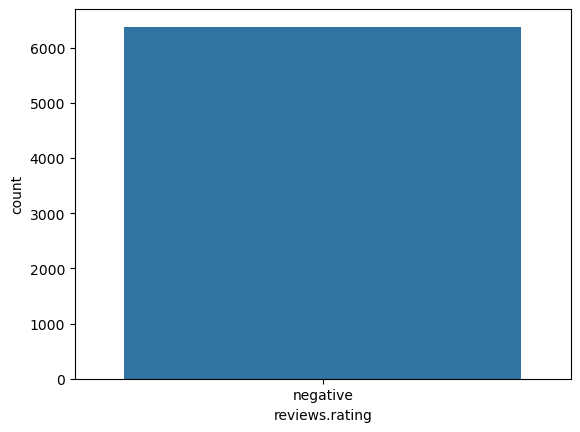

In [1614]:
sns.countplot(x="reviews.rating", data=combined)

In [1639]:
def balance_data(a_df):
    print(a_df)
    indices = {"neutral": a_df[a_df['reviews.rating'] == "neutral"].index, "positive": a_df[a_df['reviews.rating'] == "positive"].index, "negative": a_df[a_df['reviews.rating'] == "negative"].index}
    dfs = {"neutral": pd.DataFrame(a_df.loc[indices["neutral"]]), "positive": pd.DataFrame(a_df.loc[indices["positive"]]), "negative": pd.DataFrame(a_df.loc[indices["negative"]])}
    
    for key in nums.keys():
        remove_n = -(nums[min(nums)] - nums[key])
        if remove_n != 0:
            drop_indices = np.random.choice(indices[key], remove_n, replace=False)
            dfs[key] = dfs[key].drop(drop_indices)
            print(len(drop_indices))

    return pd.concat([dfs["neutral"], dfs["positive"], dfs["negative"]])

In [1641]:
test = pd.DataFrame(model.df)
test = test.apply(balance_data)

0        Pleasant 10 min walk along sea front the Water...
1        Really lovely hotel. Stayed the top floor surp...
2        Ett mycket bra hotell. Det som drog ner betyge...
3        We stayed four nights October. The hotel staff...
4        We stayed four nights October. The hotel staff...
                               ...                        
35550    Best Best!!!! My family I stayed the Grin Bear...
35551    Amazing Vacation Beautiful Cabin We stayed a l...
35552    My husband stayed Tree Tops is Bearfoot Resort...
35553    share opinion this businesswith YP visitors ac...
35554           xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Name: reviews.text, Length: 35531, dtype: object


KeyError: 'reviews.rating'